In [6]:
import pandas as pd
import numpy as np
from hyperopt import hp, fmin, tpe
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [17]:
data = pd.read_csv('proccessed_data.csv')                                   #导入数据
X = data.drop(columns=['_id', 'totalPrice'])                                #只保留特征
y = data['totalPrice']
X_train,X_test,y_train,y_test=\
    train_test_split(X,y,test_size=0.2) 

model=XGBRegressor()
model.load_model('./model/XGBR.model')

y_pred=model.predict(X_test)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 640x480 with 0 Axes>

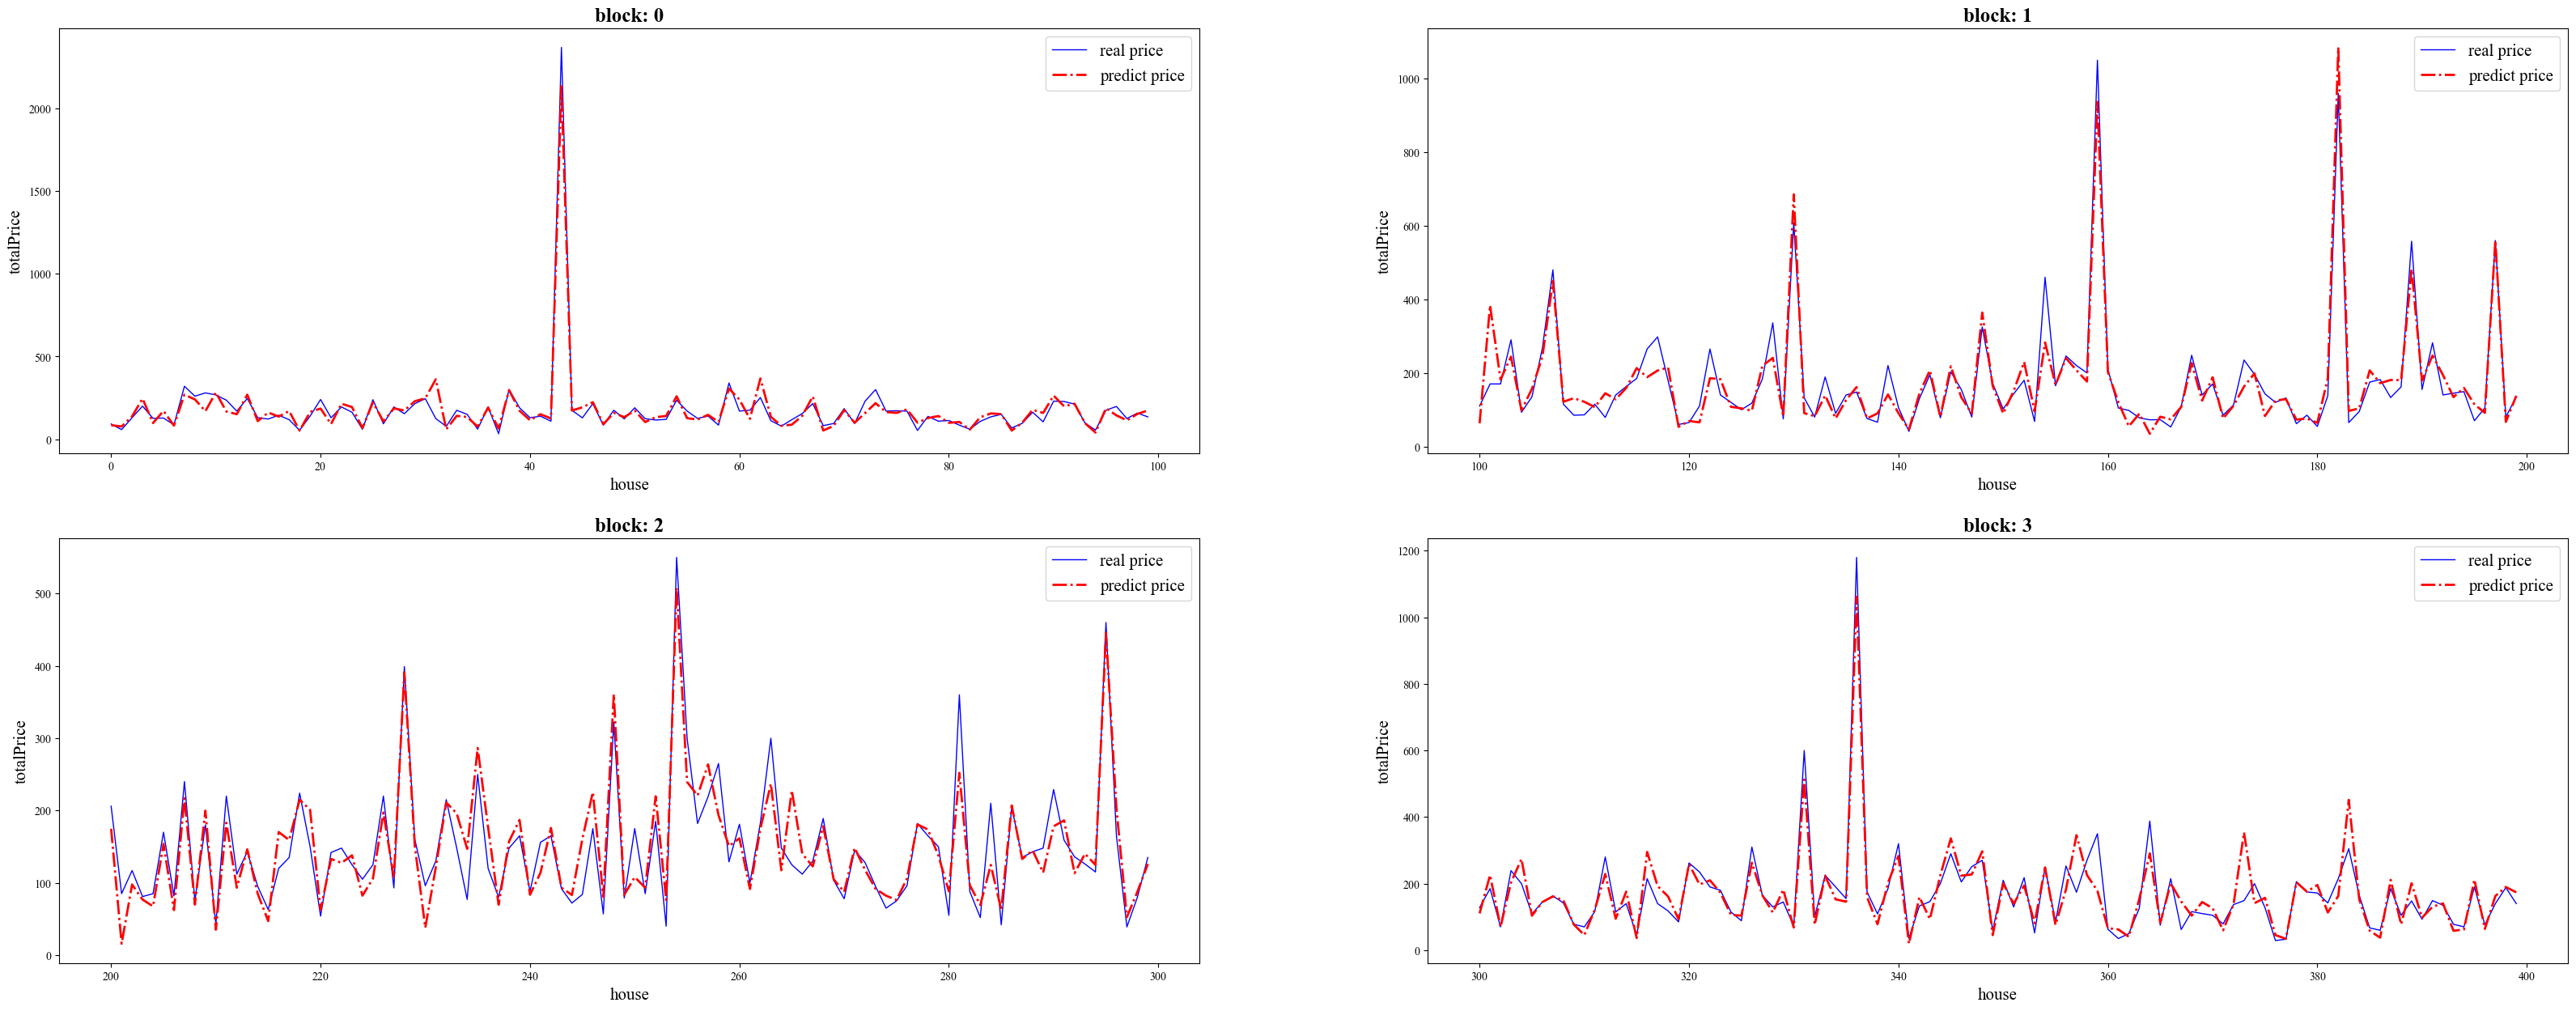

In [23]:
plt.rcParams['font.sans-serif'] = 'Times New Roman'
plt.rcParams['axes.unicode_minus'] = False
plt.tight_layout()

f, axes = plt.subplots(2, 2, figsize=(40, 15))
axes=axes.ravel()
block_size=100
for i in range(y_test.size//block_size):
    ax=axes[i]
    start=block_size*i
    end=start+block_size 
    if end > y_test.size:
        end=y_test.size
    x=np.arange(start,end)
    ax.plot(x,y_test[start:end].values,'b',lw=1)
    ax.plot(x,y_pred[start:end],'r-.',lw=2)
    ax.set_title(f'block: {i}',fontsize=18,fontweight='bold')
    ax.legend(['real price','predict price'],fontsize=15)
    ax.set_xlabel('house',fontsize=15)
    ax.set_ylabel('totalPrice',fontsize=15)
plt.savefig('./img/Predict_Result.eps',\
    format='eps',bbox_inches='tight',pad_inches=0.0)
plt.show()